# ImageDataGenerator
Tensorflow에서 제공하는 이미지 데이터에 대한 여러가지 옵션들을 제공

## 이미지 변형 옵션들을 제공
- 수집한 이미지 데이터가 많이 없을 때 사용
- 이미지를 여러 방면으로 훈련시키기 위함

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [5]:
image = X_train[0]
image.shape

(28, 28, 1)

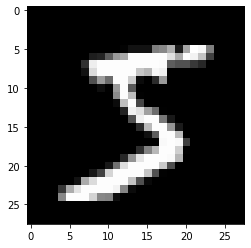

In [6]:
plt.imshow(image[:, :, 0], "gray")
plt.show()

## Augmentation
원래 존재하던 이미지에 추가적인 정보를 넣어주는 행위

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 20,  # 최대 20도 각도로 이미지가 회전
    width_shift_range = 0.2,  # 좌우로 최대 20%만큼 이미지가 움직임
    height_shift_range = 0.2,  # 상하로 최대 20%만큼 이미지가 움직임
    horizontal_flip = True  # 좌우 반전
)

In [8]:
inputs_demo = image[tf.newaxis, ...]
inputs_demo.shape

(1, 28, 28, 1)

In [28]:
# flow 함수는 데이터의 배치를 만드는 기능이 있다.
# 이미지제너레이터가 만들어진다는 이야기.
# label 없이 우선 만들어보겠음.

demo_ds = datagen.flow(inputs_demo)  # 배열를 flow를 통해서 이미지 변환을 한다.
gen_image = next(iter(demo_ds))

gen_image.shape

(1, 28, 28, 1)

In [29]:
inputs_demo.shape  # 원본 이미지도 사이즈 동일

(1, 28, 28, 1)

In [30]:
# 바뀌기 전, 후의 shape는 동일해야함
# 안의 픽셀들만 움직여야 하는 것이니까

## 비교를 위해 시각화 하기

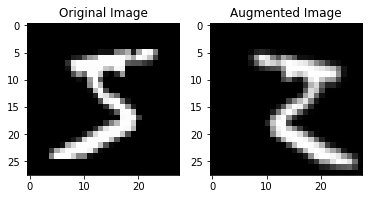

In [31]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs_demo), "gray")
plt.title("Original Image")

plt.subplot(122)
plt.title("Augmented Image")
plt.imshow(np.squeeze(gen_image), "gray")
plt.show()

In [17]:
# 랜덤하게 적용되는 것이기 때문에 적용된 이미지가 나올 수도 있고 
# 적용 안 된 이미지가 나올 수도 있다.

In [32]:
# 갖고 있는 이미지가 적을 때 이런 이미지 사용할 수 있음
# 원본 이미지, 변화된 이미지 같이 사용

# ImageDataGenerator의 변형 옵션
- width_shift_range : 좌우 이동 범위 지정
- height_shift_range : 상하 이동 범위 지정
- brightness_range : 밝기 조절 하기
- zoom_range : 확대
- horizontal_flip : 좌우 반전 여부(True/ False)
- vertical_flip : 상하 반전 여부(True/ False)
- rescale : 데이터 크기 조정

In [33]:
# train 데이터에 rescale 이 사용되었으면 test_data generator에도 rescale이 필요하다.
# 정규화과정이니까

train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale=1./255.,  # 정규화하는 것
    
)
test_datagen = ImageDataGenerator(
    rescale = 1./ 255.  # 같이 만들어줘야 함
)